In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tb
import plotnine as p9
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\pokal\Downloads\Surgical-deepnet.csv\Surgical-deepnet.csv")
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [4]:
df.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,...,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,...,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440,0.252135
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,...,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663,0.434253
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000,0.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000,0.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000,1.000000


In [5]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

<Axes: >

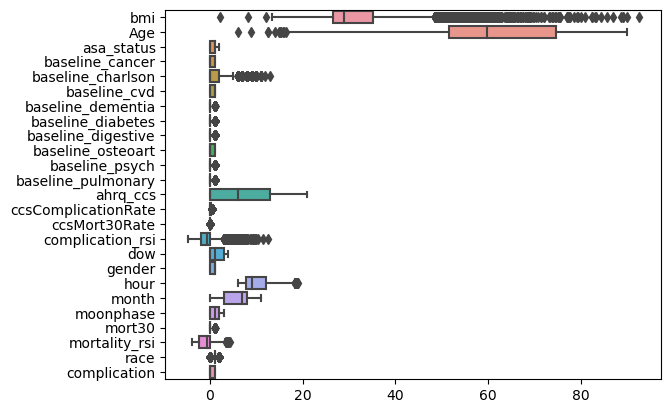

In [6]:
sns.boxplot(data=df,orient="h")

In [7]:
for i in df:
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

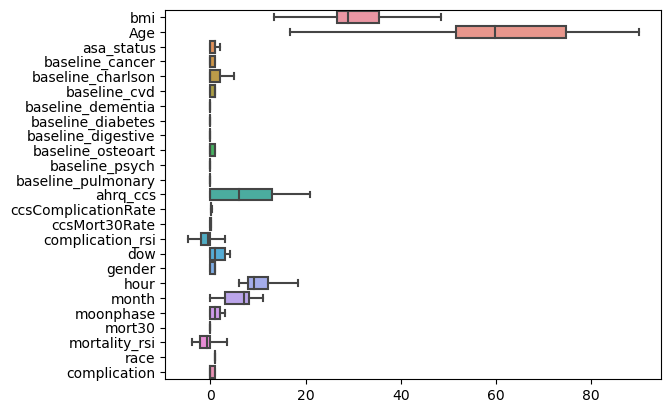

In [8]:
sns.boxplot(data=df,orient="h")

# Data Partition

In [9]:
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = df.drop(['complication'],axis=1)
y = df[['complication']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=459)

# Model build for Logistic Regression

In [10]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
Model3 = lreg.fit(X_train,y_train)

In [11]:
np.round(Model3.intercept_,4)

array([0.1084])

In [12]:
np.round(Model3.coef_,4)

array([[-7.0000e-03,  2.3000e-03,  1.9500e-02, -2.3100e-02,  1.9200e-02,
         3.1200e-02,  0.0000e+00, -0.0000e+00, -0.0000e+00,  2.6100e-02,
        -0.0000e+00, -0.0000e+00,  1.0000e-03,  1.7965e+00, -6.7528e+00,
         6.0500e-02,  1.6800e-02, -9.6000e-03,  5.0000e-04, -4.5000e-03,
         2.2500e-02,  0.0000e+00,  4.0500e-02,  0.0000e+00]])

In [13]:
Model3.feature_names_in_

array(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour',
       'month', 'moonphase', 'mort30', 'mortality_rsi', 'race'],
      dtype=object)

In [14]:
np.round(Model3.score(X_train,y_train),3)

0.243

In [15]:
# Y = intercept + b1 * Tv + b2 * radio + b3 * newspaper
Y = 2.7452 + 0.0476 * 241.7  + 0.1847 * 38 +0.0038 *23.2
Y

21.35688

# Model Build for Logistic Regression

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy',cv=5)
Model3.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [17]:
Model3.feature_names_in_

array(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour',
       'month', 'moonphase', 'mort30', 'mortality_rsi', 'race'],
      dtype=object)

In [18]:
Model3.get_feature_names_out()

array(['bmi', 'baseline_cancer', 'baseline_cvd', 'ccsComplicationRate',
       'complication_rsi'], dtype=object)

In [19]:
X_train = X_train.loc[:,['bmi', 'baseline_cancer', 'baseline_cvd', 'ccsComplicationRate','complication_rsi']]
X_train

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi
12728,37.51,1,0,0.312029,0.00
3027,26.56,0,0,0.105720,0.00
3771,18.94,0,1,0.081977,-2.29
12960,26.20,1,1,0.335461,0.39
9431,38.76,0,1,0.081977,-1.72
...,...,...,...,...,...
2391,24.93,0,0,0.105720,0.00
11609,30.74,0,1,0.183370,-1.41
13472,35.43,0,1,0.150706,-0.59
8380,45.94,0,0,0.084034,-0.50


In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output

In [21]:
output.intercept_  # beto 

array([-0.85743424])

In [22]:
output.coef_  # Beta 1 -- 

array([[-0.03995263,  0.27980035,  0.36961738,  6.97966652,  0.65194012]])

In [23]:
output.feature_names_in_

array(['bmi', 'baseline_cancer', 'baseline_cvd', 'ccsComplicationRate',
       'complication_rsi'], dtype=object)

# Prediction on train dataset 

In [24]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication
12728,37.51,1,0,0.312029,0.00,1
3027,26.56,0,0,0.105720,0.00,0
3771,18.94,0,1,0.081977,-2.29,0
12960,26.20,1,1,0.335461,0.39,1
9431,38.76,0,1,0.081977,-1.72,0


In [25]:
train['Probability']= output.predict_proba(X_train)[:,1]
train

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication,Probability
12728,37.51,1,0,0.312029,0.00,1,0.525378
3027,26.56,0,0,0.105720,0.00,0,0.234929
3771,18.94,0,1,0.081977,-2.29,0,0.102911
12960,26.20,1,1,0.335461,0.39,1,0.792636
9431,38.76,0,1,0.081977,-1.72,0,0.070074
...,...,...,...,...,...,...,...
2391,24.93,0,0,0.105720,0.00,0,0.246835
11609,30.74,0,1,0.183370,-1.41,1,0.205000
13472,35.43,0,1,0.150706,-0.59,1,0.225115
8380,45.94,0,0,0.084034,-0.50,0,0.080742


In [26]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication,Probability,Predicted
12728,37.51,1,0,0.312029,0.00,1,0.525378,0
3027,26.56,0,0,0.105720,0.00,0,0.234929,0
3771,18.94,0,1,0.081977,-2.29,0,0.102911,0
12960,26.20,1,1,0.335461,0.39,1,0.792636,1
9431,38.76,0,1,0.081977,-1.72,0,0.070074,0


In [27]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['complication'])
matrix

array([[7594, 2137],
       [  93,  420]], dtype=int64)

In [28]:
Accuracy_Train=((7594+420)/(10244)*100)
print(Accuracy_Train)

78.23115970324093


# Prediction on test Dataset

In [64]:
X_test = X_test.loc[:,['bmi', 'baseline_cancer', 'baseline_cvd', 'ccsComplicationRate','complication_rsi']]
X_test

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi
3283,25.26,0,0,0.068478,-0.37
1613,34.25,1,1,0.081977,-2.29
4321,22.35,1,1,0.109369,-0.84
13287,31.79,1,0,0.109369,-0.90
2878,20.35,0,0,0.105720,-1.08
...,...,...,...,...,...
14419,37.30,1,1,0.197305,0.10
6204,28.98,0,1,0.081977,-1.97
12924,34.72,0,1,0.183370,-0.83
76,22.35,0,0,0.135417,0.00


In [65]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication
3283,25.26,0,0,0.068478,-0.37,0
1613,34.25,1,1,0.081977,-2.29,0
4321,22.35,1,1,0.109369,-0.84,0
13287,31.79,1,0,0.109369,-0.90,1
2878,20.35,0,0,0.105720,-1.08,0


In [68]:
test['Probability']=output.predict_proba(X_test)[:,1]
test.head()

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication,Predicted,Probability
3283,25.26,0,0,0.068478,-0.37,0.163844,0,0.163844
1613,34.25,1,1,0.081977,-2.29,0.076057,0,0.076057
4321,22.35,1,1,0.109369,-0.84,0.292096,0,0.292096
13287,31.79,1,0,0.109369,-0.90,0.158276,0,0.158276
2878,20.35,0,0,0.105720,-1.08,0.162918,0,0.162918


In [69]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication,Predicted,Probability
3283,25.26,0,0,0.068478,-0.37,0.163844,0,0.163844
1613,34.25,1,1,0.081977,-2.29,0.076057,0,0.076057
4321,22.35,1,1,0.109369,-0.84,0.292096,0,0.292096
13287,31.79,1,0,0.109369,-0.90,0.158276,0,0.158276
2878,20.35,0,0,0.105720,-1.08,0.162918,0,0.162918


In [70]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['complication'])
print(matrix)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Model Build For Decision Tree


In [29]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [30]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,complication,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi
12728,1,37.51,1,0,0.312029,0.00
3027,0,26.56,0,0,0.105720,0.00
3771,0,18.94,0,1,0.081977,-2.29
12960,1,26.20,1,1,0.335461,0.39
9431,0,38.76,0,1,0.081977,-1.72


In [31]:
independent_variable = list(train.columns[1:])
independent_variable

['bmi',
 'baseline_cancer',
 'baseline_cvd',
 'ccsComplicationRate',
 'complication_rsi']

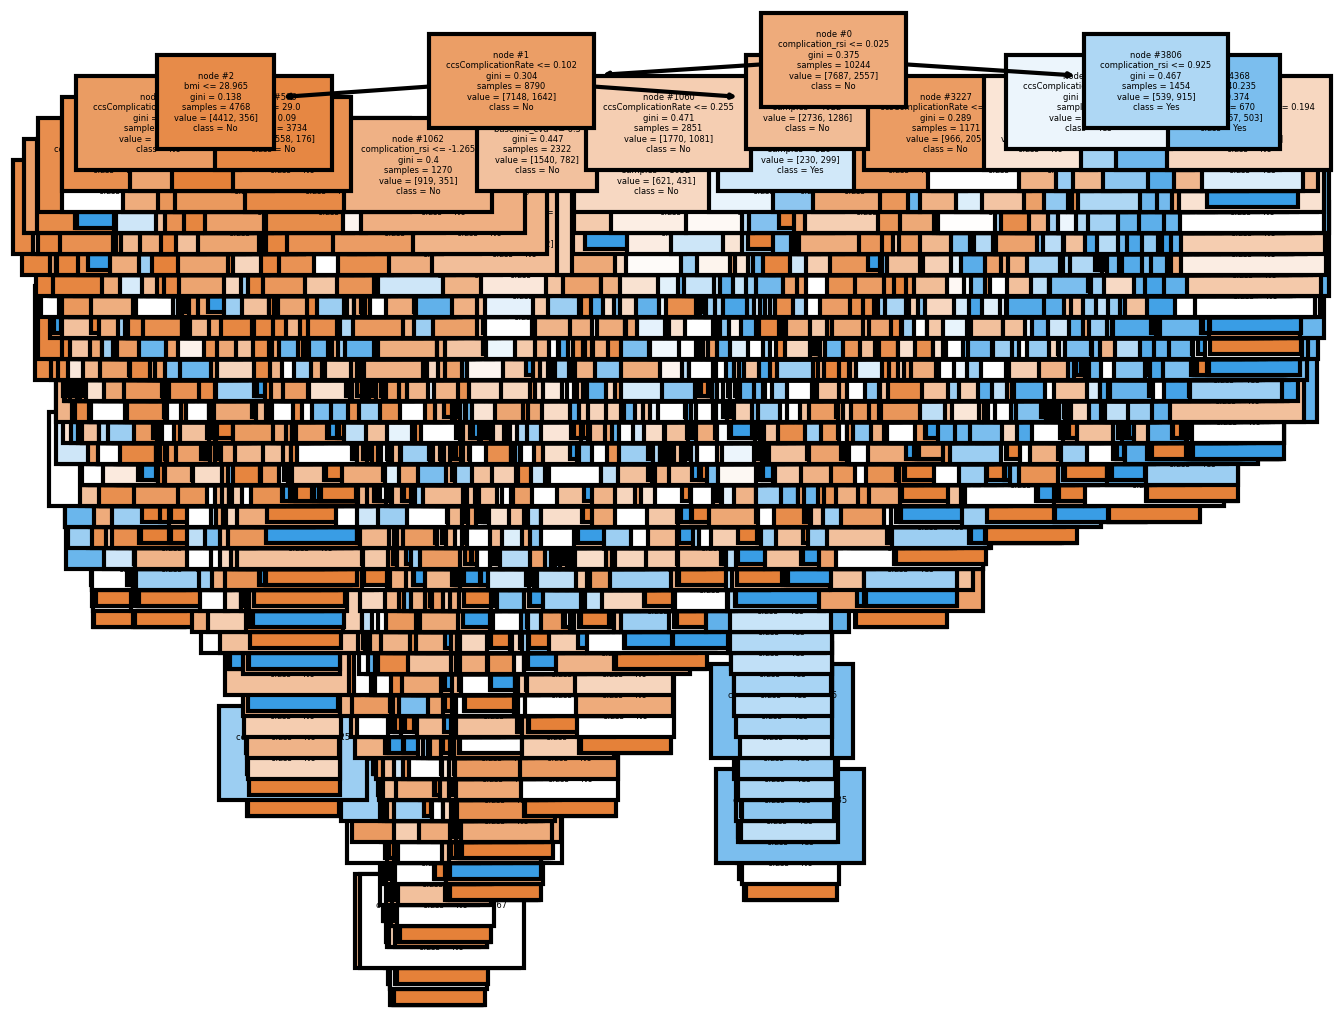

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [33]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,complication,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,Predicted
12728,1,37.51,1,0,0.312029,0.00,1
3027,0,26.56,0,0,0.105720,0.00,0
3771,0,18.94,0,1,0.081977,-2.29,0
12960,1,26.20,1,1,0.335461,0.39,1
9431,0,38.76,0,1,0.081977,-1.72,0


In [34]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['complication'])
print(matrix)

[[7687   38]
 [   0 2519]]


In [35]:
Accuracy_Train=((7687+2519)/(10244)*100)
print(Accuracy_Train)   # overfit or High accuracy

99.62905115189379


In [36]:
from sklearn.metrics import classification_report
print(classification_report(train['complication'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7687
           1       1.00      0.99      0.99      2557

    accuracy                           1.00     10244
   macro avg       1.00      0.99      1.00     10244
weighted avg       1.00      1.00      1.00     10244



In [37]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=55, ## child
                                 min_samples_split=20, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=55, min_samples_split=20)

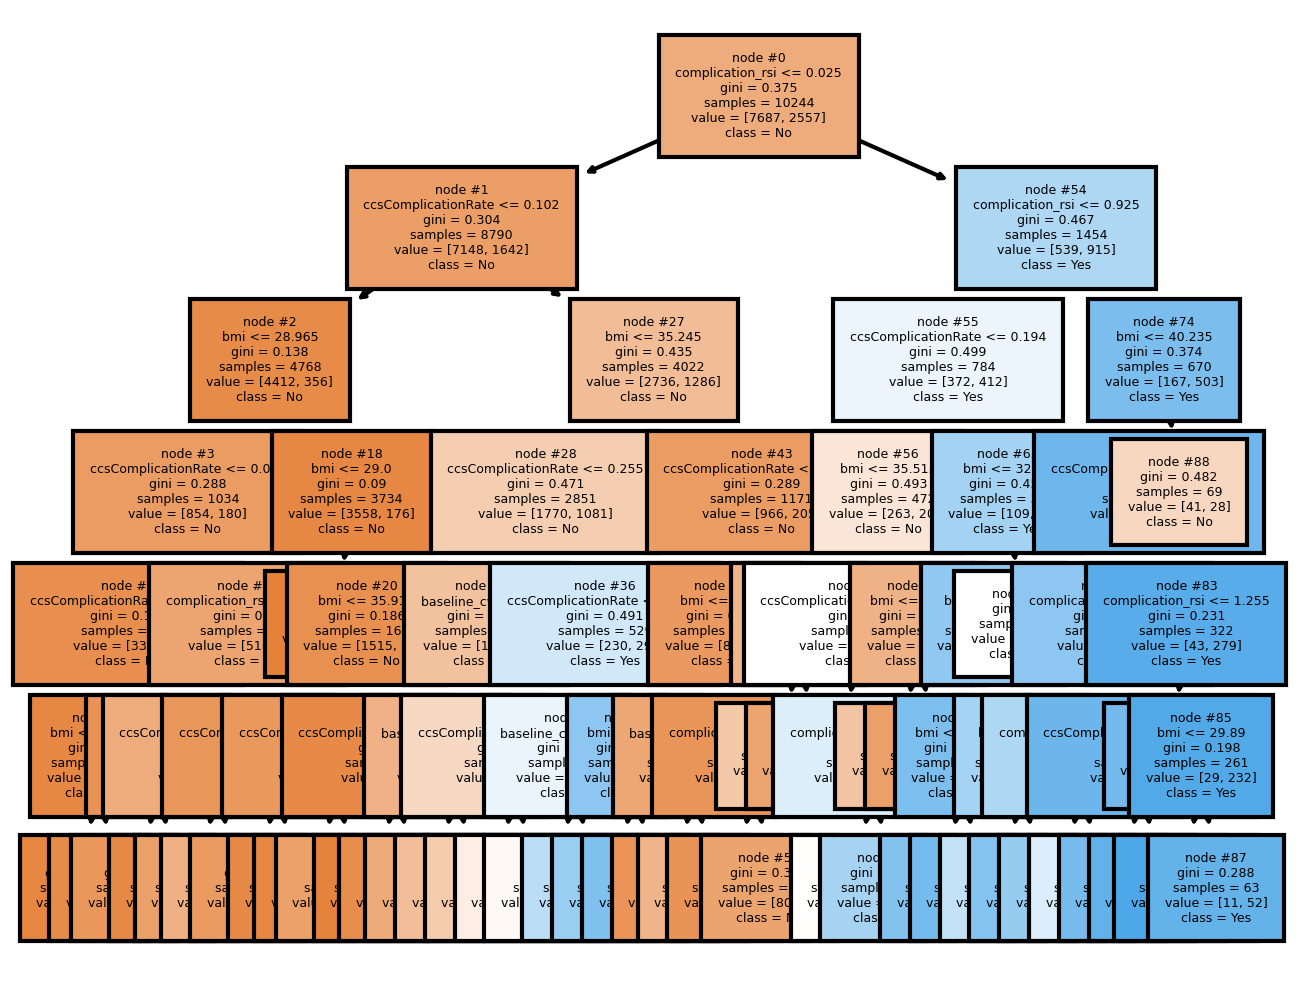

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [39]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,complication,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,Predicted
12728,1,37.51,1,0,0.312029,0.00,0
3027,0,26.56,0,0,0.105720,0.00,0
3771,0,18.94,0,1,0.081977,-2.29,0
12960,1,26.20,1,1,0.335461,0.39,1
9431,0,38.76,0,1,0.081977,-1.72,0


In [40]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['complication'])
print(matrix)

[[7358 1680]
 [ 329  877]]


In [41]:
Accuracy_Train=((7358+877)/(10244)*100)
print(Accuracy_Train)

80.38852010933229


In [42]:
from sklearn.metrics import classification_report
print(classification_report(train['complication'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7687
           1       0.73      0.34      0.47      2557

    accuracy                           0.80     10244
   macro avg       0.77      0.65      0.67     10244
weighted avg       0.79      0.80      0.78     10244



## Tunning by grid search

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [5, 4,6], ## Parent 
           'min_samples_leaf': [5,4,6], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6], 'min_samples_leaf': [5, 4, 6],
                         'min_samples_split': [5, 4, 6]},
             verbose=1)

In [44]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [45]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=5, ## child
                                 min_samples_split=5, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5)

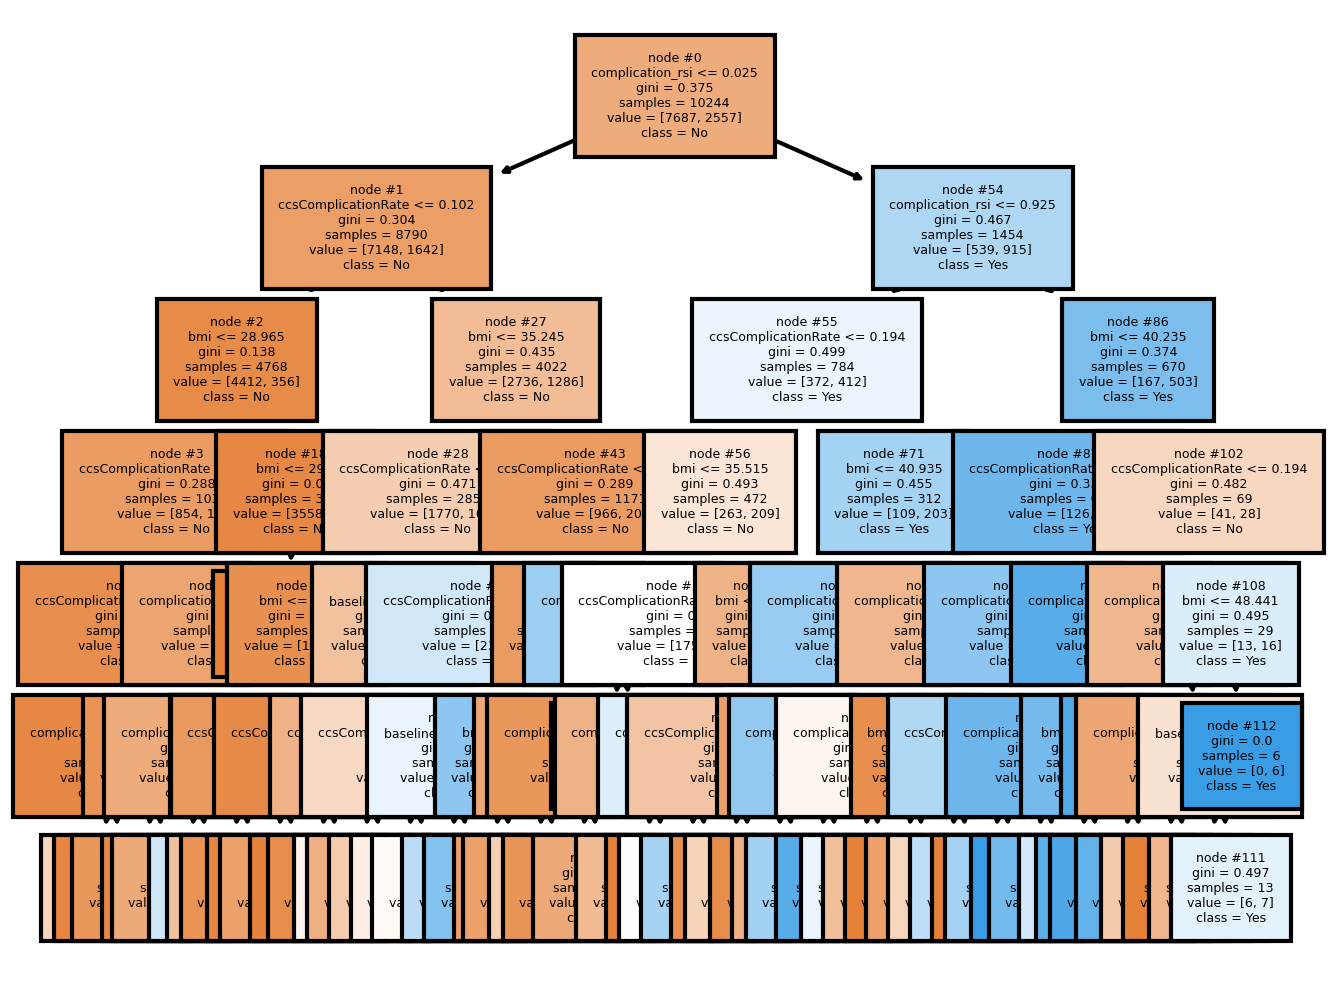

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [47]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,complication,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,Predicted
12728,1,37.51,1,0,0.312029,0.00,0
3027,0,26.56,0,0,0.105720,0.00,0
3771,0,18.94,0,1,0.081977,-2.29,0
12960,1,26.20,1,1,0.335461,0.39,1
9431,0,38.76,0,1,0.081977,-1.72,0


In [48]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['complication'])
print(matrix)

[[7332 1620]
 [ 355  937]]


In [49]:
Accuracy_Train=((7332+937)/(10244)*100)
print(Accuracy_Train)

80.72042171026943


# Model Build for Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=20)

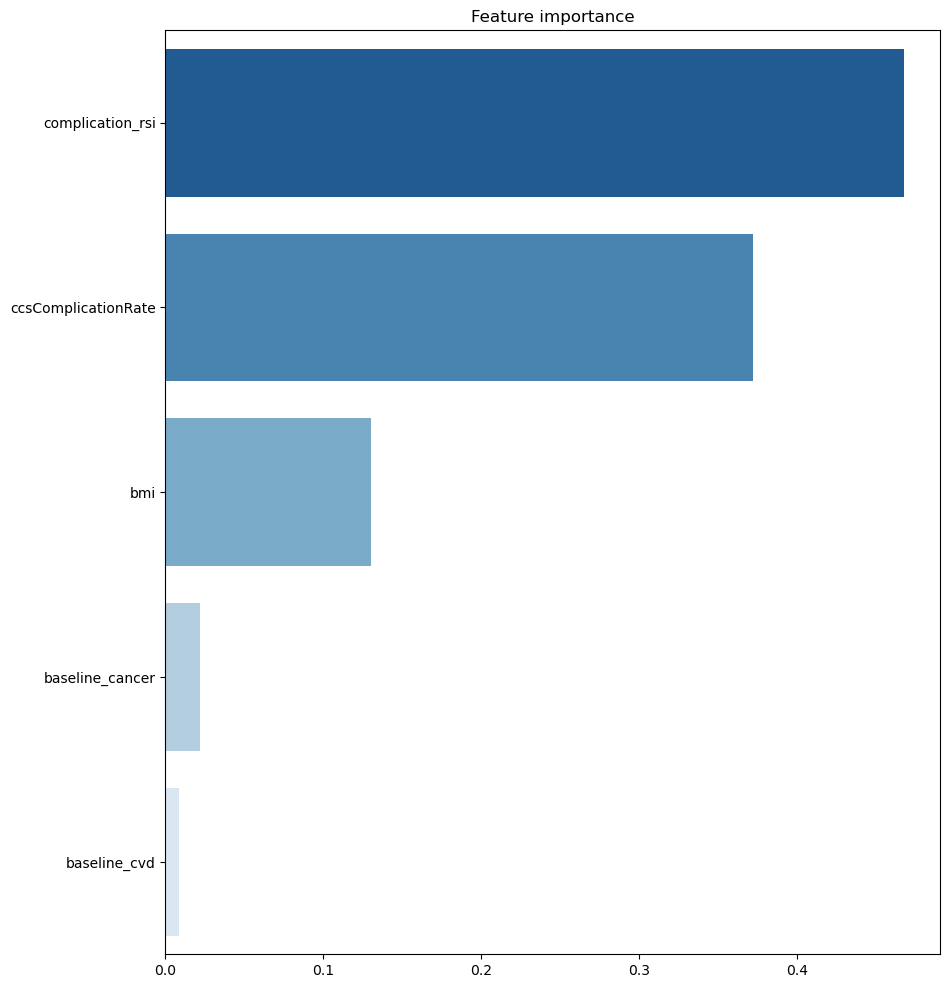

In [51]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_r", orient='h')

In [52]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [53]:
list(x.columns)

['bmi',
 'Age',
 'asa_status',
 'baseline_cancer',
 'baseline_charlson',
 'baseline_cvd',
 'baseline_dementia',
 'baseline_diabetes',
 'baseline_digestive',
 'baseline_osteoart',
 'baseline_psych',
 'baseline_pulmonary',
 'ahrq_ccs',
 'ccsComplicationRate',
 'ccsMort30Rate',
 'complication_rsi',
 'dow',
 'gender',
 'hour',
 'month',
 'moonphase',
 'mort30',
 'mortality_rsi',
 'race']

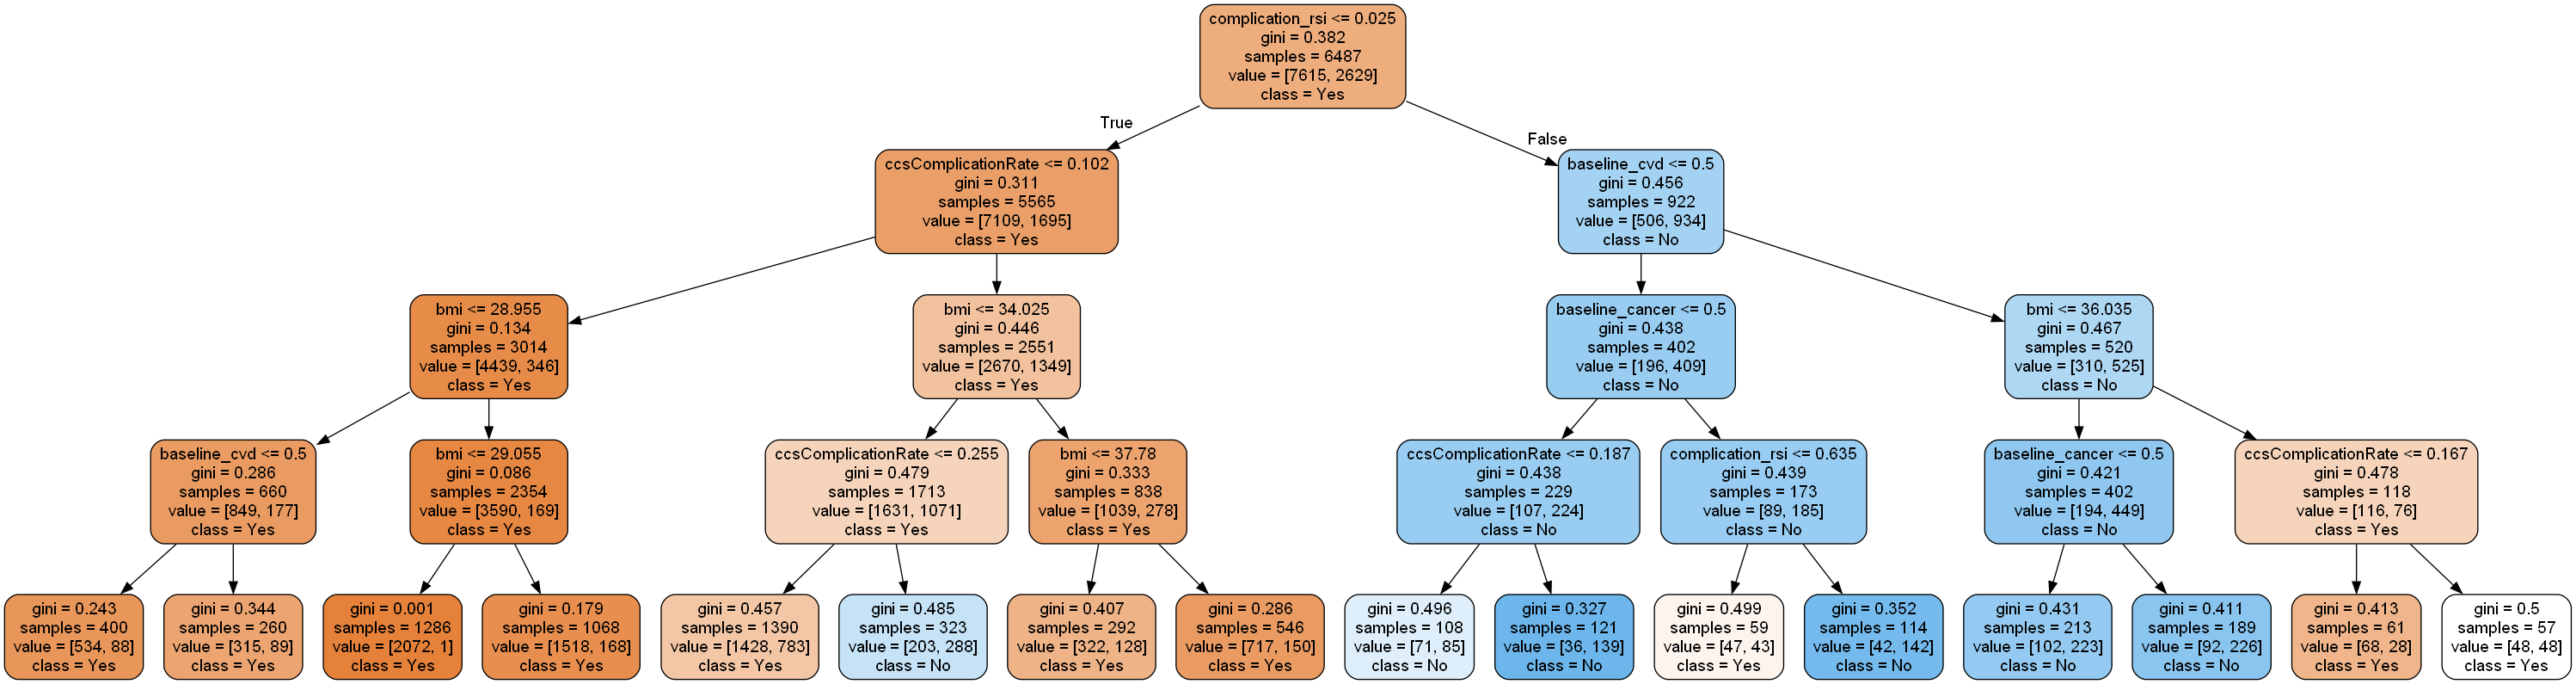

In [54]:
# Assuming your model was trained with X_train, which has 5 features
# Adjust this according to your actual data and model
feature_list = list(X_train.columns)

# Specify the tree number
tree = Model.estimators_[5]

# Specify the target classes
Churn = ['Yes', 'No']

# Export the decision tree graph
export_graphviz(tree, out_file='abc.dot',
                feature_names=feature_list,
                leaves_parallel=True,
                class_names=Churn,
                rounded=True,
                filled=True)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('abc.dot')

# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

In [55]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication
12728,37.51,1,0,0.312029,0.00,1
3027,26.56,0,0,0.105720,0.00,0
3771,18.94,0,1,0.081977,-2.29,0
12960,26.20,1,1,0.335461,0.39,1
9431,38.76,0,1,0.081977,-1.72,0


In [56]:
train['Predicted']=Model.predict(X_train)
train.head()

,bmi,baseline_cancer,baseline_cvd,ccsComplicationRate,complication_rsi,complication,Predicted
12728,37.51,1,0,0.312029,0.00,1,0
3027,26.56,0,0,0.105720,0.00,0,0
3771,18.94,0,1,0.081977,-2.29,0,0
12960,26.20,1,1,0.335461,0.39,1,1
9431,38.76,0,1,0.081977,-1.72,0,0


In [57]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['complication'])
print(matrix)

[[7388 1782]
 [ 299  775]]


In [58]:
Accuracy_train=((7353+848)/(10244)*100)
Accuracy_train

80.05661850839516

In [59]:
from sklearn.metrics import classification_report
print(classification_report(train['complication'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7687
           1       0.72      0.30      0.43      2557

    accuracy                           0.80     10244
   macro avg       0.76      0.63      0.65     10244
weighted avg       0.78      0.80      0.76     10244



# Model Building for Ada Boosting

In [60]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=3,  #how many tree ( Stump ) we want to make 
                         learning_rate=0.5) # its tunning Parameter & range = 0-1
# Train Adaboost Classifer
Adamodel = abc.fit(X_train, y_train)

NameError: name 'AdaBoostClassifier' is not defined

In [ ]:
train_pred = Adamodel.predict(X_train)

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

# Gradient Boosting

In [ ]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [ ]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="log_loss",criterion="squared_error")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

In [ ]:
print('The best parameter are -', gscv_GBM.best_params_)

In [ ]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

In [ ]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)

In [ ]:
train_pred

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

# Model Build for XG Boosting 

In [ ]:
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [ ]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
from xgboost.sklearn import XGBClassifier # Extrame GB
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=10, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)  ## Model building

In [ ]:
print('The best parameter are -', gscv.best_params_)

In [ ]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

In [ ]:
final_mod.get_xgb_params()

In [ ]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

In [ ]:
import xgboost as xgb
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 10 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

In [ ]:
train = pd.concat([X_train,y_train],axis=1)
train['Predicted'] = final_mod.predict(X_train)  # MODEL = Final_mod
train.head()

In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))